## Sentiment Analysis with Tweepy

* https://www.youtube.com/watch?v=YdRTs0LmiuU

### Set up environment

In [1]:
!pip install tweepy==4.9.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 77 kB 1.8 MB/s 
     |████████████████████████████████| 62 kB 699 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: tweepy
    Found existing installation: tweepy 3.10.0
    Uninstalling tweepy-3.10.0:
      Successfully uninstalled tweepy-3.10.0


In [2]:
import tweepy
import pandas as pd
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
import nltk
nltk.download('vader_lexicon')

import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


### Twitter Authentication

In [5]:
#Put your Bearer Token in the parenthesis below
client = tweepy.Client(bearer_token='AAAAAAAAAAAAAAAAAAAAABNVhgEAAAAAPAx4OsmDeRgLq6pv08CQAPZ5A0s%3DKmSN1FVeehEd9HT0LiP4zW0DrH1UT2bUdP2RkQU3PoCQ4lKjGC')

### Get recent public tweets on a keyword

In [6]:
# Pull tweets from twitter

query = '#apple -is:retweet lang:en'
paginator = tweepy.Paginator(
    client.search_recent_tweets,           # The method you want to use
    query=query,                           # Some argument for this method
    max_results=100,                       # How many tweets per page
    limit=10                               # How many pages to retrieve
)
# Get tweets that contain the hashtag #TypeKeywordHere
# -is:retweet means I don't want retweets
# lang:en is asking for the tweets to be in english

tweet_list = []

for tweet in paginator.flatten(): # Total number of tweets to retrieve
    tweet_list.append(tweet)
    print(tweet)

[$395.12]
Apple AirPods Max Wireless Over-Ear Headphones. Active Noise
#apple #airpodsMax
Source: Amazon Checker v3D
Reason: Amazon Warehouse

🛒: https://t.co/TuobU1K8TL
09:09:45.8060 AM EDT #Ad

https://t.co/VW7bB4KW24
[$395.12]
Apple AirPods Max Wireless Over-Ear Headphones. Active Noise
#apple #airpodsMax
Source: Amazon Checker v3D
Reason: Amazon Warehouse

🛒: https://t.co/KI7OhbtlEZ
09:09:45.8060 AM EDT #Ad

https://t.co/uoQe9JNWeQ
Samsung expects Apple will launch foldable iPad by 2024

#iPad #Apple #Samsung #foldableiPad #pragnews

https://t.co/CsvYieHbVH
#うひーメモ
投稿時間:2022-11-04 22:09:31
Daily deals Nov. 4: $20 off Apple Watch Ultra, $700 off 65-inch 4K LG TV, 50% off Beats Solo3, more
https://t.co/bEkq12mUZK
#Apple
Is the modern data stack just old wine in a new bottle? • TechCrunch 
#SEO #Google #Apple  #IOS #cybersecurity #Robotics #AI 
https://t.co/vLeogbyPzT

Ashish Kakran
Contributor

Ashish Kakran, principal at T... https://t.co/9mFbp9KptC
#Apple is offering 2 months of fre

In [7]:
#Creating new dataframe and new features
tweet_list_df = pd.DataFrame(tweet_list)
tweet_list_df.head()

,edit_history_tweet_ids,id,text
0,[1588519067731771399],1588519067731771399,[$395.12]\nApple AirPods Max Wireless Over-Ear...
1,[1588518999960293376],1588518999960293376,[$395.12]\nApple AirPods Max Wireless Over-Ear...
2,[1588518907081805825],1588518907081805825,Samsung expects Apple will launch foldable iPa...
3,[1588518811405164544],1588518811405164544,#うひーメモ\n投稿時間:2022-11-04 22:09:31\nDaily deals ...
4,[1588518776286285824],1588518776286285824,Is the modern data stack just old wine in a ne...


In [8]:
#Creating new dataframe and new features
# tweet_list_df = pd.DataFrame(tweet_list)
tweet_list_df = pd.DataFrame(tweet_list_df['text'])
tweet_list_df.head(5)

,text
0,[$395.12]\nApple AirPods Max Wireless Over-Ear...
1,[$395.12]\nApple AirPods Max Wireless Over-Ear...
2,Samsung expects Apple will launch foldable iPa...
3,#うひーメモ\n投稿時間:2022-11-04 22:09:31\nDaily deals ...
4,Is the modern data stack just old wine in a ne...


### Data preprocessing

In [9]:
def preprocess_tweet(sen):
    '''Cleans text data up, leaving only 2 or more char long non-stepwords composed of A-Z & a-z only
    in lowercase'''
    
    sentence = sen.lower()

    # Remove RT
    sentence = re.sub('RT @\w+: '," ", sentence)

    # Remove special characters
    sentence = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ", sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)  # When we remove apostrophe from the word "Mark's", the apostrophe is replaced by an empty space. Hence, we are left with single character "s" that we are removing here.

    # Remove multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)  # Next, we remove all the single characters and replace it by a space which creates multiple spaces in our text. Finally, we remove the multiple spaces from our text as well.

    return sentence

In [10]:
cleaned_tweets = []

for tweet in tweet_list_df['text']:
  cleaned_tweet = preprocess_tweet(tweet)
  cleaned_tweets.append(cleaned_tweet)

In [11]:
tweet_list_df['cleaned'] = pd.DataFrame(cleaned_tweets)
tweet_list_df.head(5)

,text,cleaned
0,[$395.12]\nApple AirPods Max Wireless Over-Ear...,395 12 apple airpods max wireless over ear he...
1,[$395.12]\nApple AirPods Max Wireless Over-Ear...,395 12 apple airpods max wireless over ear he...
2,Samsung expects Apple will launch foldable iPa...,samsung expects apple will launch foldable ipa...
3,#うひーメモ\n投稿時間:2022-11-04 22:09:31\nDaily deals ...,2022 11 04 22 09 31 daily deals nov 4 20 off ...
4,Is the modern data stack just old wine in a ne...,is the modern data stack just old wine in new ...


### Generate Sentiment Labels

In [12]:
#Calculating Negative, Positive, Neutral and Compound values

tweet_list_df[['polarity', 'subjectivity']] = tweet_list_df['cleaned'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tweet_list_df['cleaned'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if comp <= -0.05:
        tweet_list_df.loc[index, 'sentiment'] = "negative"
    elif comp >= 0.05:
        tweet_list_df.loc[index, 'sentiment'] = "positive"
    else:
        tweet_list_df.loc[index, 'sentiment'] = "neutral"
    tweet_list_df.loc[index, 'neg'] = neg
    tweet_list_df.loc[index, 'neu'] = neu
    tweet_list_df.loc[index, 'pos'] = pos
    tweet_list_df.loc[index, 'compound'] = comp

tweet_list_df.head(5)

,text,cleaned,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,[$395.12]\nApple AirPods Max Wireless Over-Ear...,395 12 apple airpods max wireless over ear he...,-0.133333,0.600000,positive,0.0,0.797,0.203,0.6249
1,[$395.12]\nApple AirPods Max Wireless Over-Ear...,395 12 apple airpods max wireless over ear he...,-0.133333,0.600000,positive,0.0,0.797,0.203,0.6249
2,Samsung expects Apple will launch foldable iPa...,samsung expects apple will launch foldable ipa...,0.000000,0.000000,neutral,0.0,1.000,0.000,0.0000
3,#うひーメモ\n投稿時間:2022-11-04 22:09:31\nDaily deals ...,2022 11 04 22 09 31 daily deals nov 4 20 off ...,0.250000,0.250000,neutral,0.0,1.000,0.000,0.0000
4,Is the modern data stack just old wine in a ne...,is the modern data stack just old wine in new ...,0.145455,0.318182,neutral,0.0,1.000,0.000,0.0000


### Sentiment Visualisation

In [13]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tweet_list_df_negative = tweet_list_df[tweet_list_df["sentiment"]=="negative"]
tweet_list_df_positive = tweet_list_df[tweet_list_df["sentiment"]=="positive"]
tweet_list_df_neutral = tweet_list_df[tweet_list_df["sentiment"]=="neutral"]

#### Donut Charts

In [14]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [15]:
#Count_values for sentiment
count_values_in_column(tweet_list_df,"sentiment")

,Total,Percentage
positive,490,49.05
neutral,329,32.93
negative,180,18.02


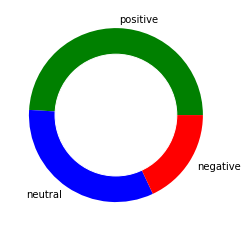

In [16]:
# create data for Pie Chart
pichart = count_values_in_column(tweet_list_df,"sentiment")
# names= pc.index
# size=pc["Percentage"]

names= pichart.index
size=pichart["Percentage"]

# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

#### Word Clouds

In [18]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My Drive/1_LiveProjects/Project9_TwitterAPI_Sentiments
!ls

Mounted at /content/drive
[Errno 2] No such file or directory: '/content/drive/My Drive/1_LiveProjects/Project9_TwitterAPI_Sentiments'
/content
drive  sample_data


In [19]:
#Function to Create Wordcloud

def create_wordcloud(text):
    mask = np.array(Image.open("./a1_inputs/cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=100,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("c1_wordcloud.png")
    print("Word Cloud Saved Successfully")
    path="c1_wordcloud.png"
    display(Image.open(path))

In [20]:
# Creating wordcloud for all tweets

create_wordcloud(tweet_list_df["cleaned"].values)
# create_wordcloud(tweet_list_df_positive["text"].values)
# create_wordcloud(tweet_list_df_negative["cleaned"].values)
# create_wordcloud(tweet_list_df_neutral["text"].values)

FileNotFoundError: ignored

#### Text Insights

In [21]:
#Calculating tweet's lenght and word count
tweet_list_df['text_len'] = tweet_list_df['cleaned'].astype(str).apply(len)
tweet_list_df['text_word_count'] = tweet_list_df['cleaned'].apply(lambda x: len(str(x).split()))

In [22]:
round(pd.DataFrame(tweet_list_df.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
negative,168.81
neutral,119.58
positive,166.85


In [23]:
round(pd.DataFrame(tweet_list_df.groupby("sentiment").text_word_count.mean()),2)

,text_word_count
sentiment,
negative,25.49
neutral,18.23
positive,25.97


### Saving Output Tweets File to Drive

In [ ]:
tweet_list_df.to_csv("./c2_sentimentanalysis_output.csv", sep=',', encoding='UTF-8')
tweet_list_df.head(5)

,text,cleaned,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count
0,#Apple is eyeing a September 7 launch date for...,apple is eyeing september 7 launch date for i...,0.136364,0.454545,neutral,0.0,1.000,0.000,0.0000,63,12
1,The latest Apple Watch Daily News! https://t.c...,the latest apple watch daily news applewatch a...,0.250000,0.450000,neutral,0.0,1.000,0.000,0.0000,50,8
2,C$19.99 - #FreeShipping | Super sale means sup...,c 19 99 freeshipping super sale means super sa...,0.183333,0.333333,positive,0.0,0.762,0.238,0.8316,189,28
3,Vietnam to make Apple Watch and MacBook for fi...,vietnam to make apple watch and macbook for fi...,0.375000,0.416667,neutral,0.0,1.000,0.000,0.0000,144,23
4,When you need to write Unit Tests but long wee...,when you need to write unit tests but long wee...,-0.050000,0.400000,positive,0.0,0.776,0.224,0.7351,98,19
